In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde

from sklearn.linear_model import LinearRegression

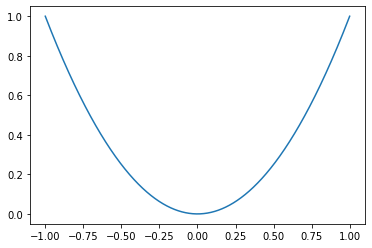

In [15]:
plt.plot(np.linspace(-1, 1, 1000), np.linspace(-1, 1, 1000) ** 2)

In [10]:
np.random.seed(123)
height = np.random.normal(166, np.sqrt(3), 1000)
weight = np.random.exponential(1/50, 1000)
age = np.random.uniform(30, 60, 1000) + height * 0.01 + weight * 0.8

features = [height, weight, age]
names = ['height', 'weight', 'age']

In [ ]:
plt.hist()

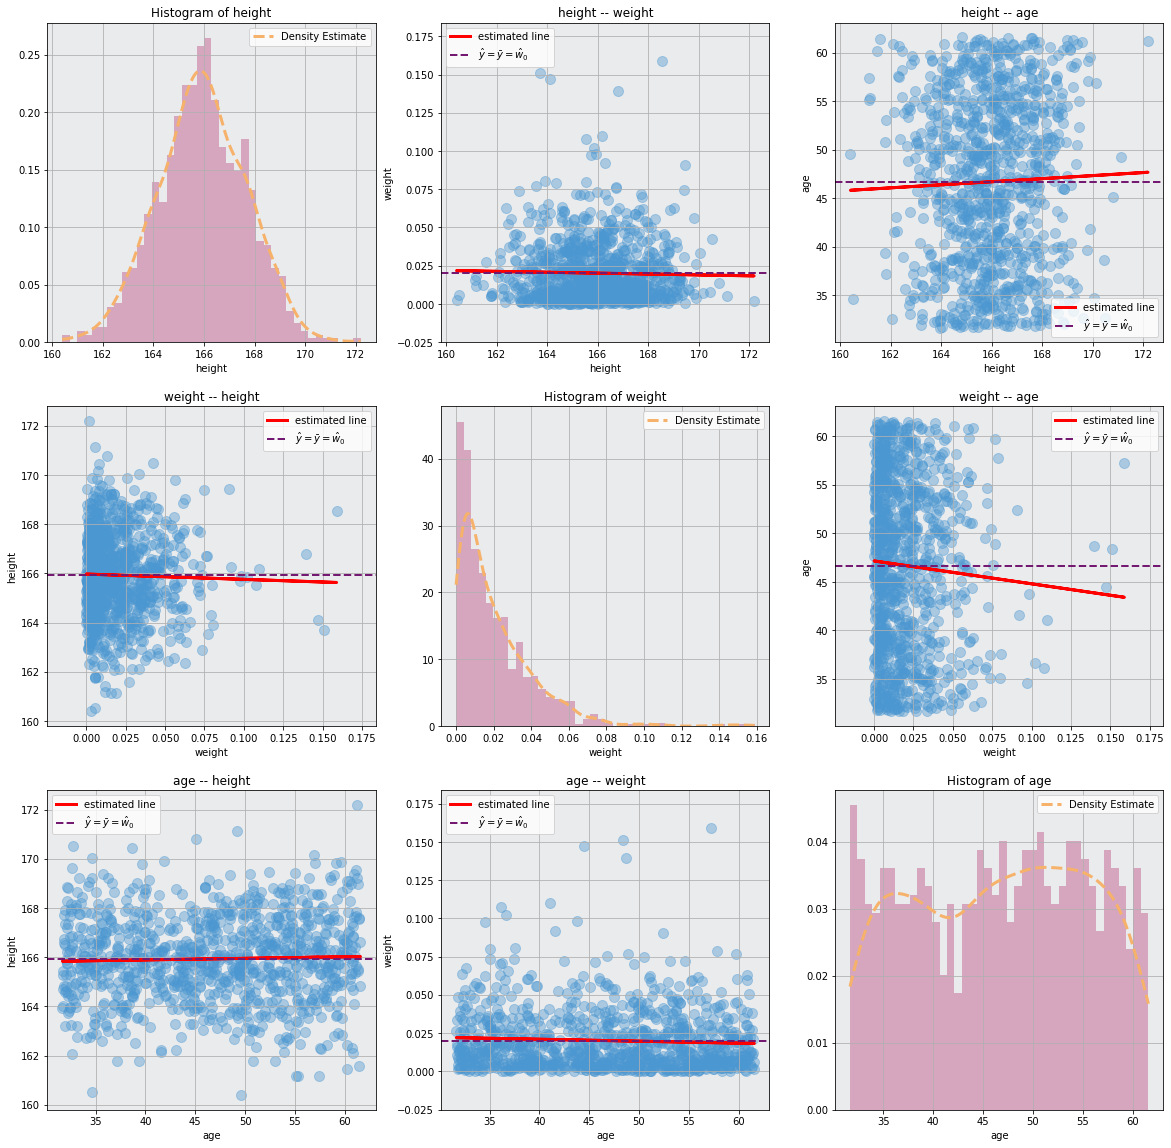

In [59]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

for i in range(3):
    for j in range(3):
        if i == j:
            # Histogram
            ax[i, j].hist(features[i], bins = 40, density = True, color = "#d5a6bd")
            ax[i, j].set_title(f"Histogram of {names[i]}")
            ax[i, j].set_xlabel(names[i])
            
            # Estimate and plot density
            density_model = gaussian_kde(features[i])
            x = np.linspace(min(features[i]), max(features[i]), 1000)
            ax[i, j].plot(x, density_model(x), label = 'Density Estimate', linestyle = '--', linewidth = 3,
                          color = '#f6b26b')
            ax[i, j].legend()
        else:
            # Scatter plots
            ax[i, j].scatter(features[i], features[j], s = 100, alpha = 0.4, c = "#4B97D1")
            ax[i, j].set_title(f"{names[i]} -- {names[j]}")
            ax[i, j].set_xlabel(names[i])
            ax[i, j].set_ylabel(names[j])
            
            model = LinearRegression()
            model.fit(features[i].reshape(-1, 1), features[j].reshape(-1, 1))
            y_pred = model.predict(features[i].reshape(-1, 1))
            
            ax[i, j].plot(features[i], y_pred, linewidth = 3, c = 'red', label = 'estimated line')
            
            ax[i, j].axhline(np.mean(features[j]), linestyle = '--', linewidth = 2, 
                             c = '#741971', label = r'$\hat{y} = \bar{y} = \hat{w}_0$')
            ax[i, j].legend()
        
        ax[i, j].set_facecolor('#eaebed')
        ax[i, j].grid()
# Вне циклов:
#ax[0, 0].hist(height)
#ax[0, 1].scatter(height, weight)
#ax[1, 1].hist(weight)
#ax[2, 2].hist(age)

In [68]:
from sklearn.datasets import load_iris
X = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
y = load_iris()['target']

In [66]:
load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [69]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


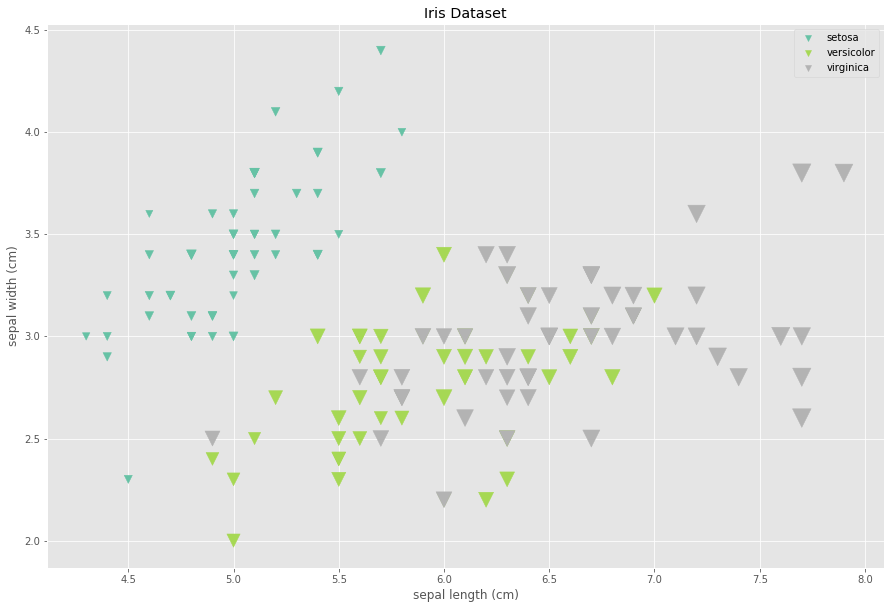

In [87]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 10))
sc = plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c = y, s = 50 * X['petal length (cm)'], marker = 'v',
            cmap = 'Set2')
plt.title('Iris Dataset')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles = sc.legend_elements()[0], labels = ['setosa', 'versicolor', 'virginica'])

In [86]:
sc.legend_elements()

([<matplotlib.lines.Line2D at 0x7f81643e7fa0>,
 ['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$'])

In [88]:
sectors = [90, 90, 180, 45]

([<matplotlib.patches.Wedge at 0x7f8148252220>,
 [Text(0.8426488837530798, 0.70706637503822, '90'),
  Text(-0.5500000148652439, 0.9526279355804298, '90'),
  Text(-0.5499999702695119, -0.9526279613277873, '180'),
  Text(1.0336618994982714, -0.3762221119573192, '45')])

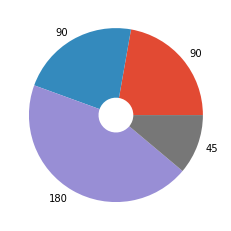

In [99]:
plt.pie(sectors, labels = ['90', '90', '180', '45'], radius = 1, wedgeprops = {"width": 0.8})

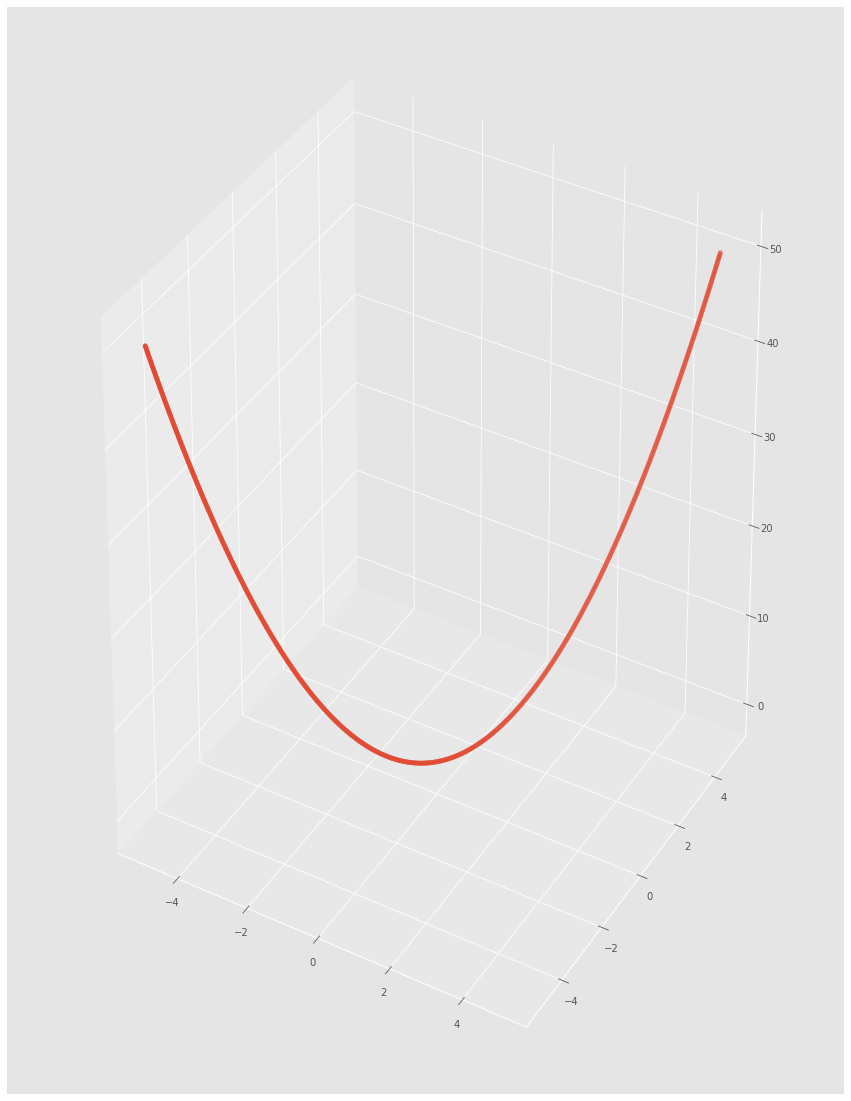

In [102]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (15, 20))
ax = fig.gca(projection = '3d')

x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
z = x ** 2 + y ** 2

ax.scatter(x, y, z)

In [103]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

#       y0.               y1. .... y1000
# x0   (x0, y0) (x0, y1)
# x1
# ...
# x1000

X, Y = np.meshgrid(x, y)

In [107]:
X

array([[-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       ...,
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ],
       [-5.        , -4.98998999, -4.97997998, ...,  4.97997998,
         4.98998999,  5.        ]])

In [106]:
Y.shape

(1000, 1000)

In [108]:
Z = np.sin(X) - 4 * np.cos(Y)

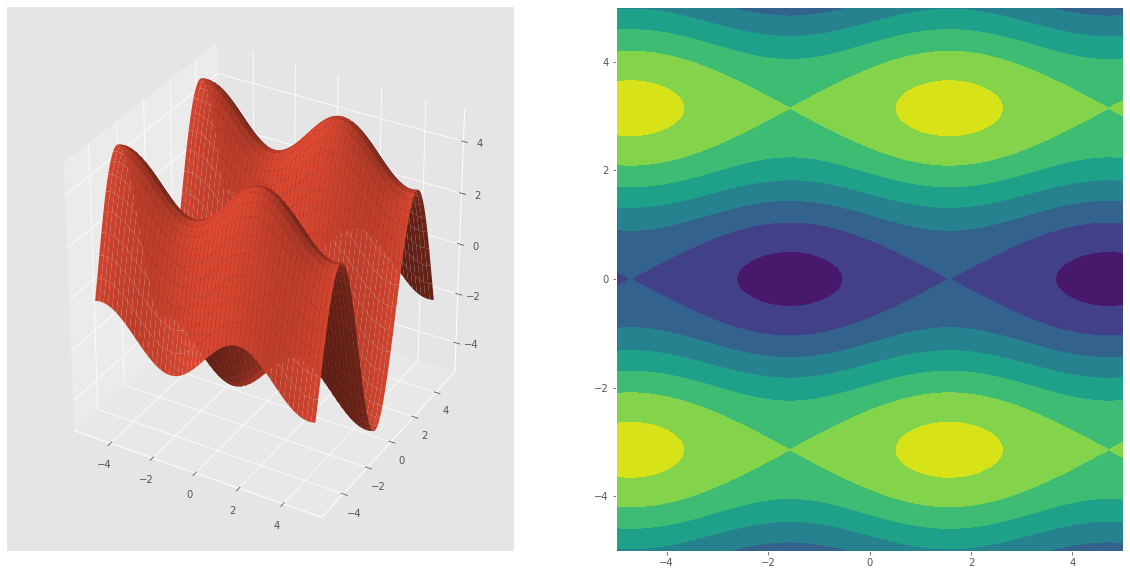

In [116]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, Z)
ax = fig.add_subplot(1, 2, 2)
ax.contourf(X, Y, Z)

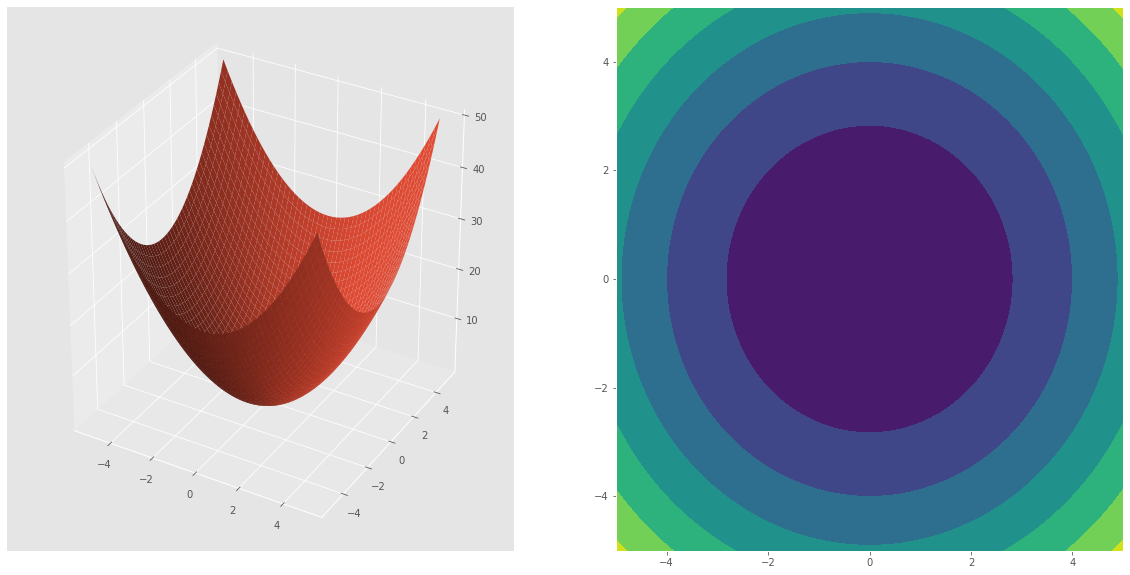

In [117]:
Z = X ** 2 + Y ** 2
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.plot_surface(X, Y, Z)
ax = fig.add_subplot(1, 2, 2)
ax.contourf(X, Y, Z)

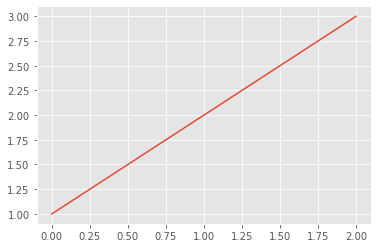

In [119]:
x = [1, 2, 3]
plt.plot(np.arange(len(x)), x)